In [1]:
#pip install pystan <- run first time this notebook is executed
#pip install fbprophet <- run first time this notebook is executed

In [2]:
import pandas as pd
import datetime
from fbprophet import Prophet

In [3]:
df_k_means_z_0 = pd.read_parquet('../common/clustering_results/df_kmeans_z_0.parquet')

In [4]:
countires_k_means_z_0 = list(df_k_means_z_0.columns)

In [5]:
df = pd.read_parquet('dataframe_prophet_format.parquet')

In [6]:
df

,Cases,Country,Date
0,3.0,Algeria,2020-03-01
1,3.0,Algeria,2020-03-02
2,3.0,Algeria,2020-03-03
3,5.0,Algeria,2020-03-04
4,12.0,Algeria,2020-03-05
...,...,...,...
17884,7508.0,Zimbabwe,2020-09-13
17885,7526.0,Zimbabwe,2020-09-14
17886,7531.0,Zimbabwe,2020-09-15
17887,7576.0,Zimbabwe,2020-09-16


In [7]:
df_1 = df[df['Country'].isin(countires_k_means_z_0)]

In [8]:
df_1.head(5)

,Cases,Country,Date
804,0.0,Bangladesh,2020-03-01
805,0.0,Bangladesh,2020-03-02
806,0.0,Bangladesh,2020-03-03
807,0.0,Bangladesh,2020-03-04
808,0.0,Bangladesh,2020-03-05


In [9]:
df_final=df_1[['Date','Cases','Country']].rename({'Date':'ds','Cases':'y'}, axis='columns')

In [10]:
df_final.reset_index(drop=True, inplace=True)

In [11]:
df_final

,ds,y,Country
0,2020-03-01,0.0,Bangladesh
1,2020-03-02,0.0,Bangladesh
2,2020-03-03,0.0,Bangladesh
3,2020-03-04,0.0,Bangladesh
4,2020-03-05,0.0,Bangladesh
...,...,...,...
4417,2020-09-13,1780.0,Uruguay
4418,2020-09-14,1808.0,Uruguay
4419,2020-09-15,1812.0,Uruguay
4420,2020-09-16,1827.0,Uruguay


In [12]:
countries = df_final.groupby('Country')

In [16]:
for country in countries.groups:
    group = countries.get_group(country)
    train=group[(group['ds'] >= '2020-03-01') & (group['ds'] <= '2020-08-17')]
    test=group[(group['ds'] > '2016-08-17')]

In [17]:
target = pd.DataFrame()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

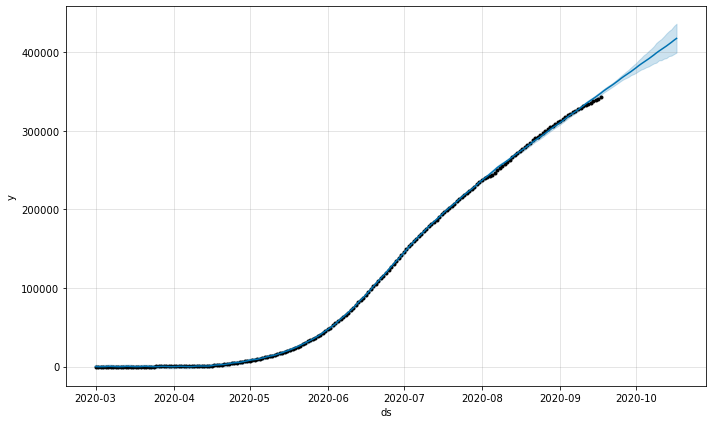

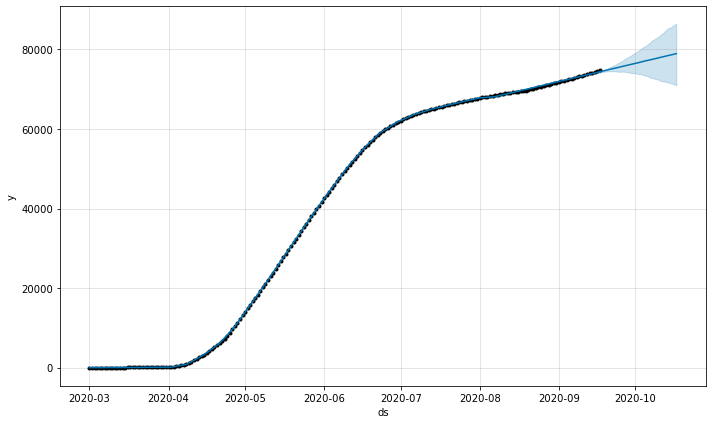

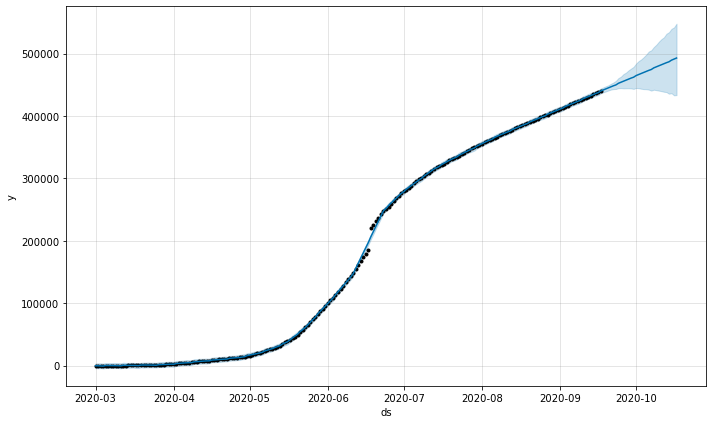

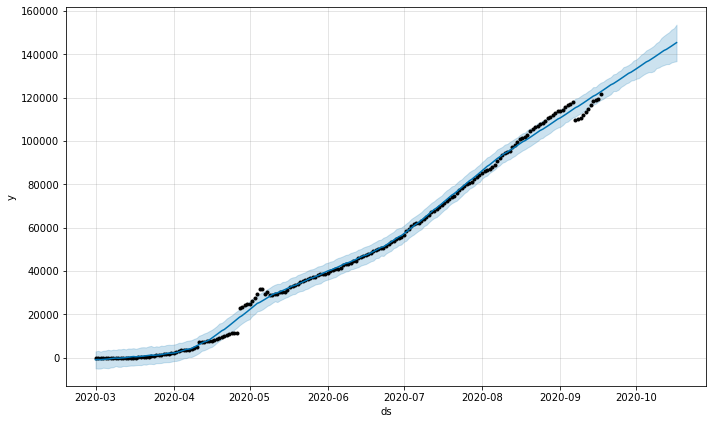

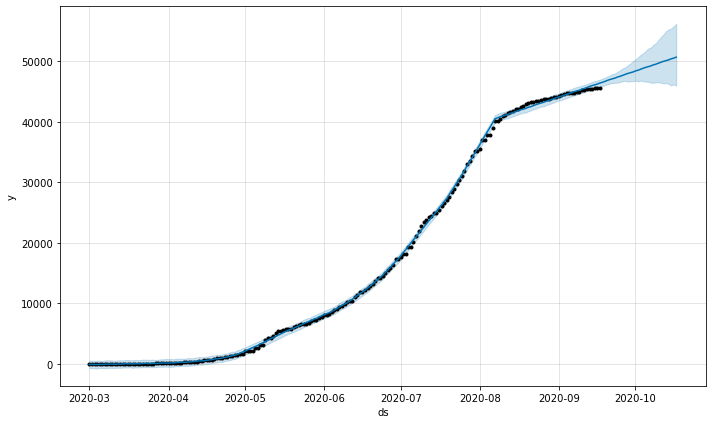

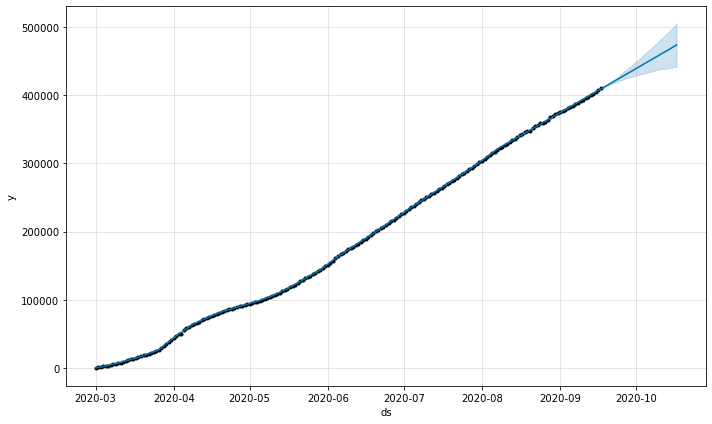

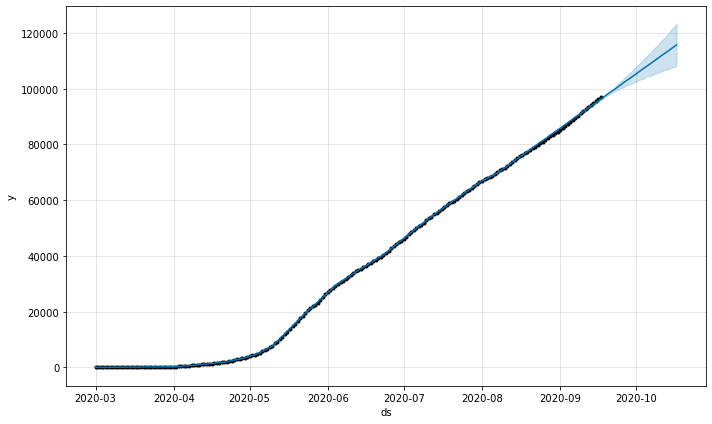

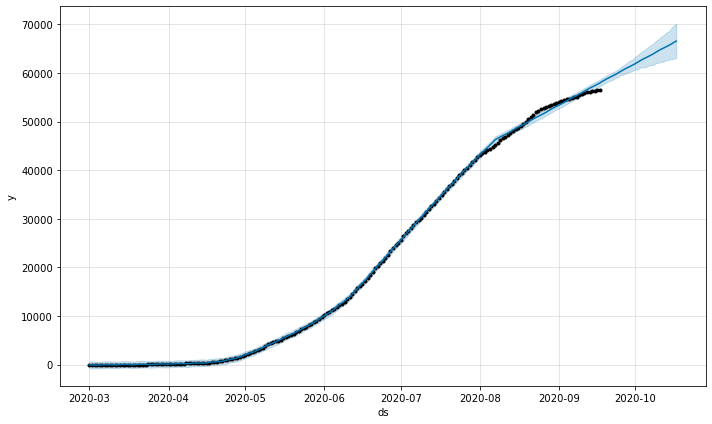

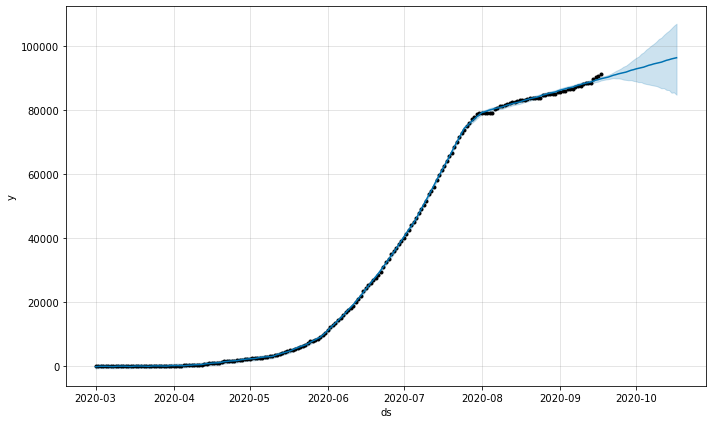

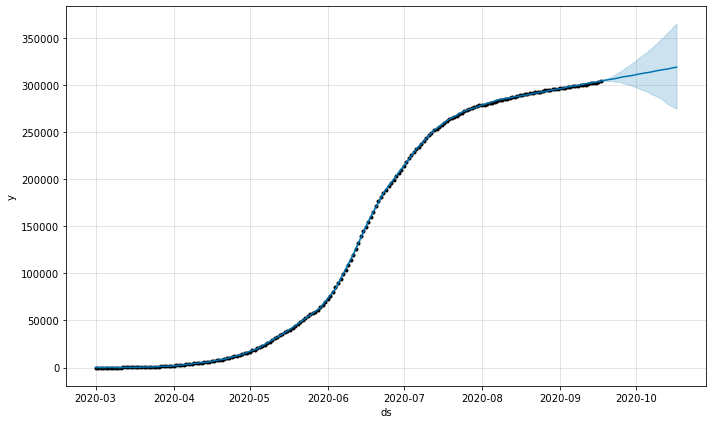

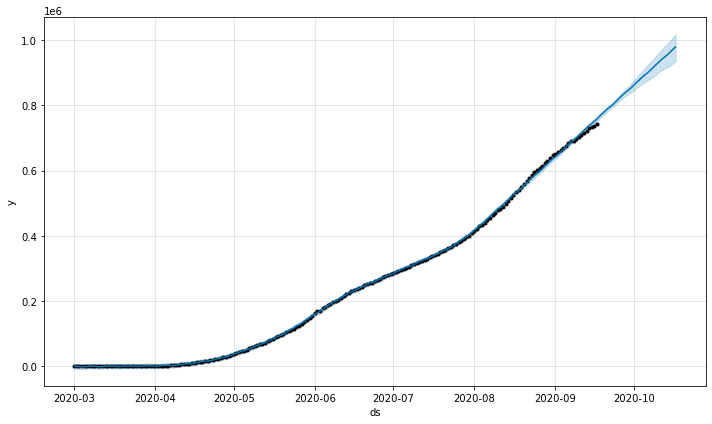

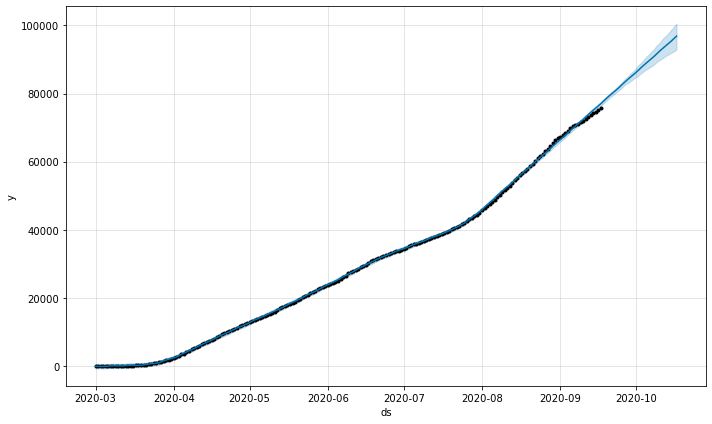

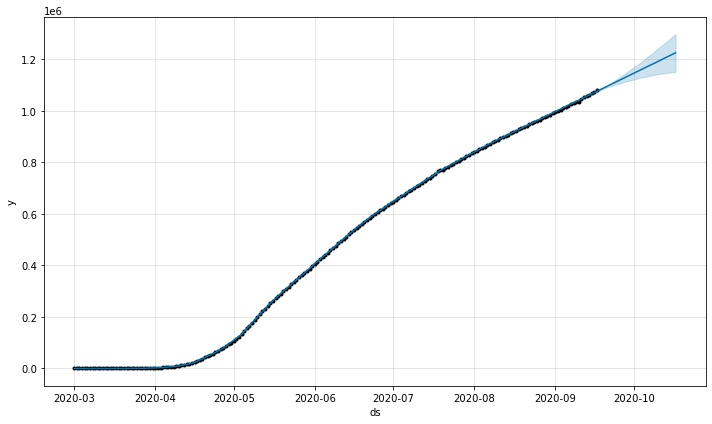

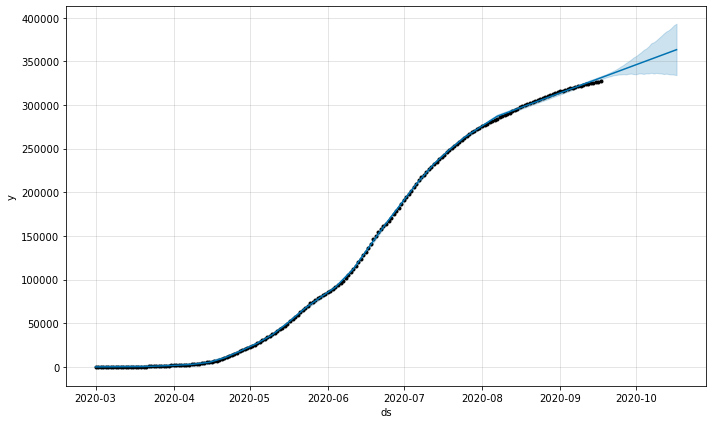

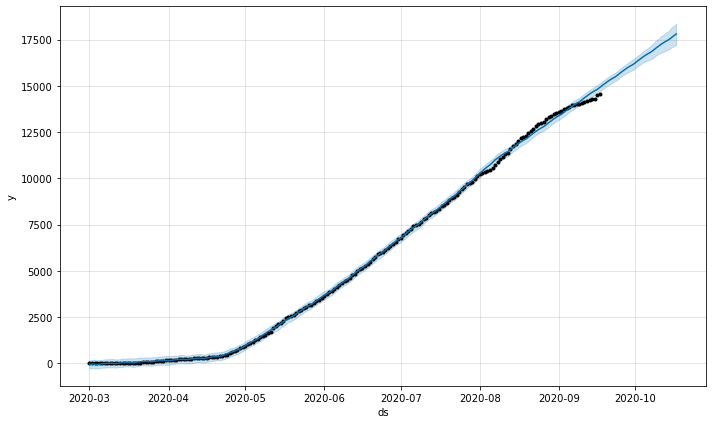

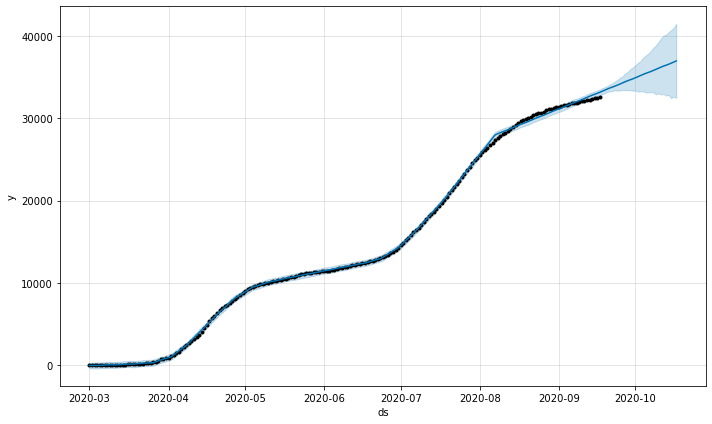

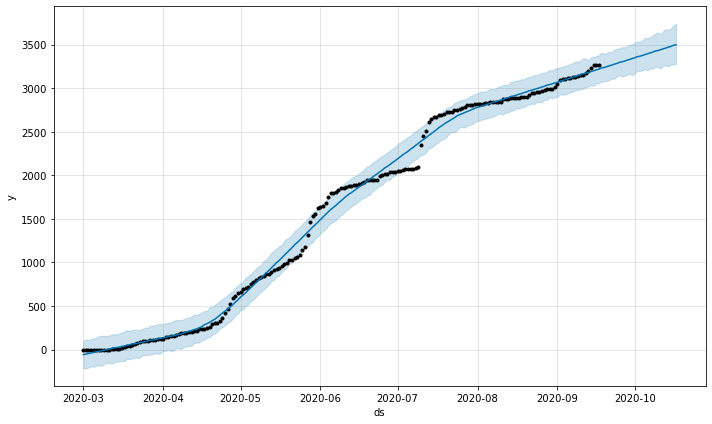

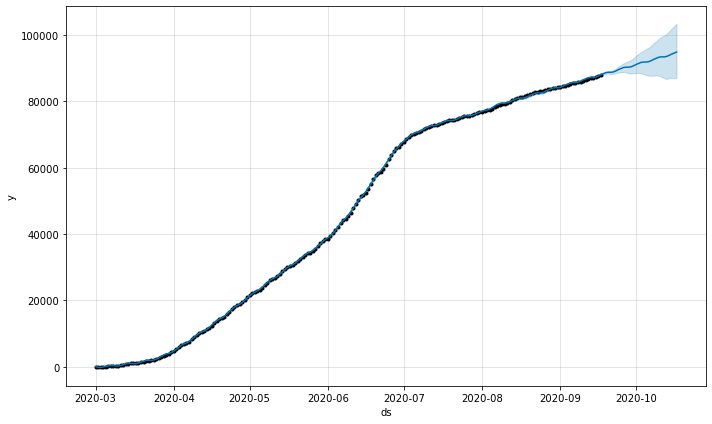

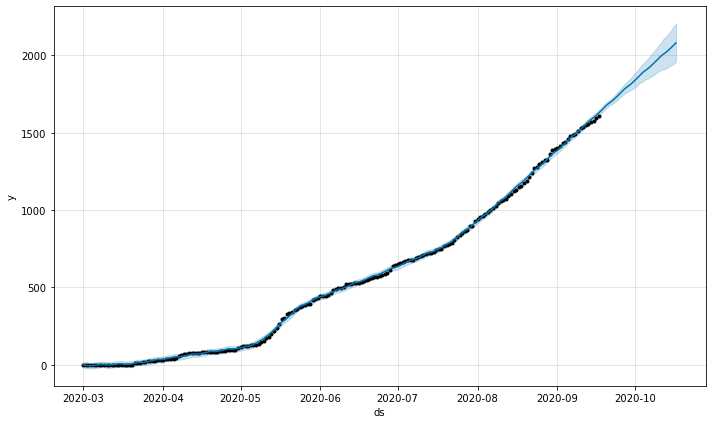

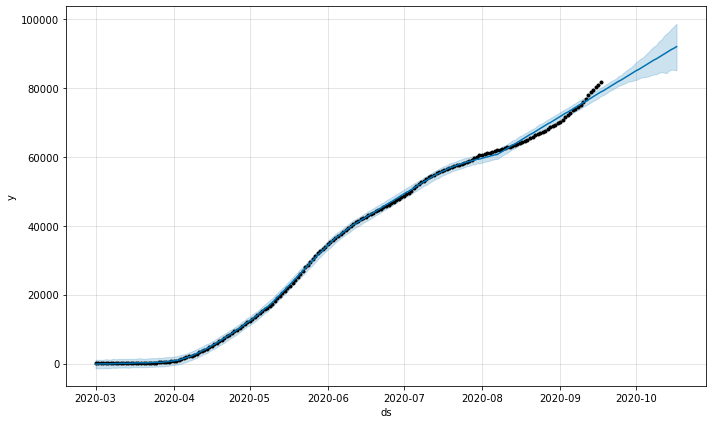

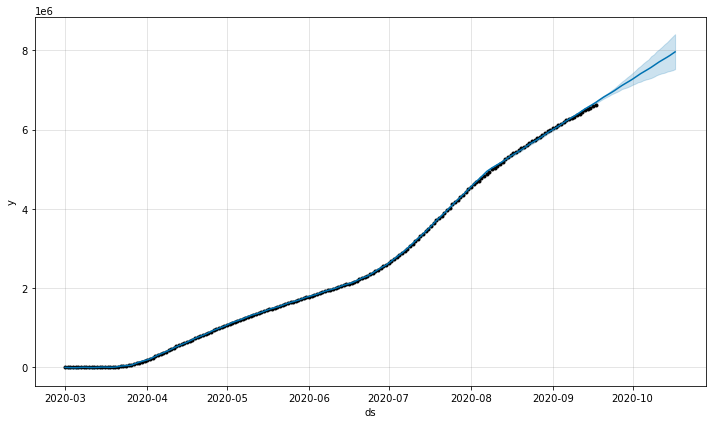

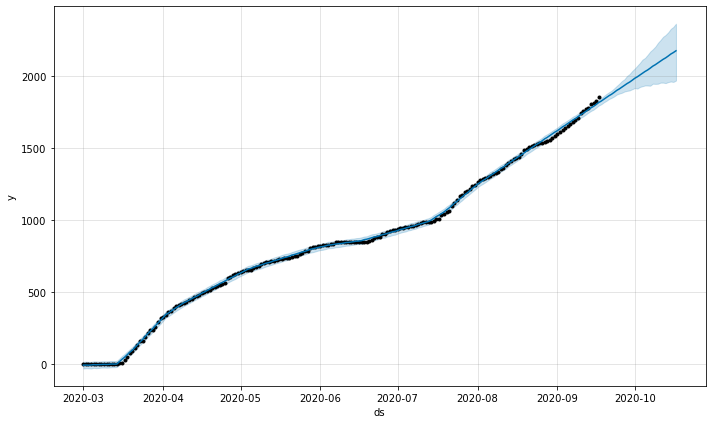

In [18]:
for country in countries.groups:
    group = countries.get_group(country)
    
    m = Prophet(interval_width=0.95)
    m.fit(group)
    future = m.make_future_dataframe(periods=30)
    forecast = m.predict(future)
    m.plot(forecast)  
    forecast = forecast.rename(columns={'yhat': 'yhat_'+country})
    target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)